<a href="https://colab.research.google.com/github/shouwiz/CampusX/blob/Feature_scaling/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df = df.iloc[:,2:]

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
248,41,52000,0
201,49,74000,0
218,46,96000,0
84,30,62000,0
322,41,52000,0


#### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis =1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [12]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

#### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [20]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


####  Effect Of Scaling

Text(0.5, 1.0, 'After Scaling')

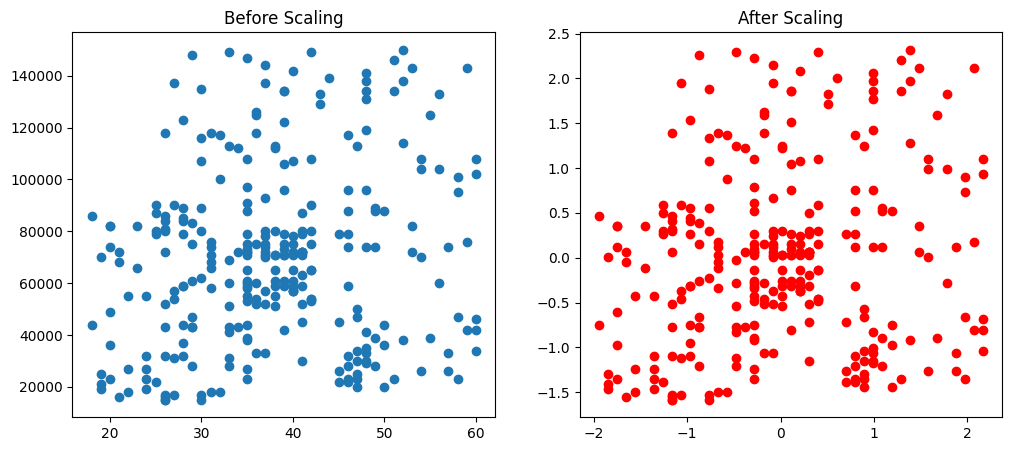

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

<Axes: title={'center': 'AFter Scaling'}, xlabel='Age', ylabel='Density'>

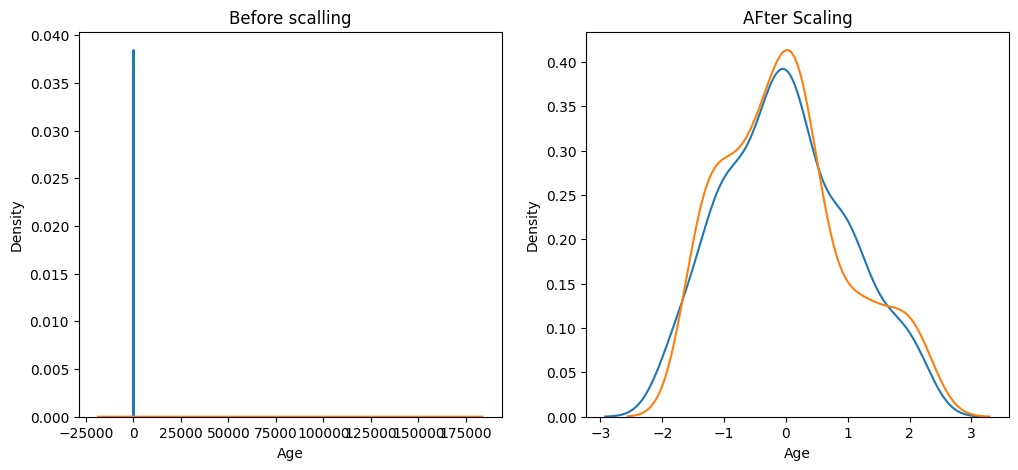

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before scalling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("AFter Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

#### Comparing between Distribution

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

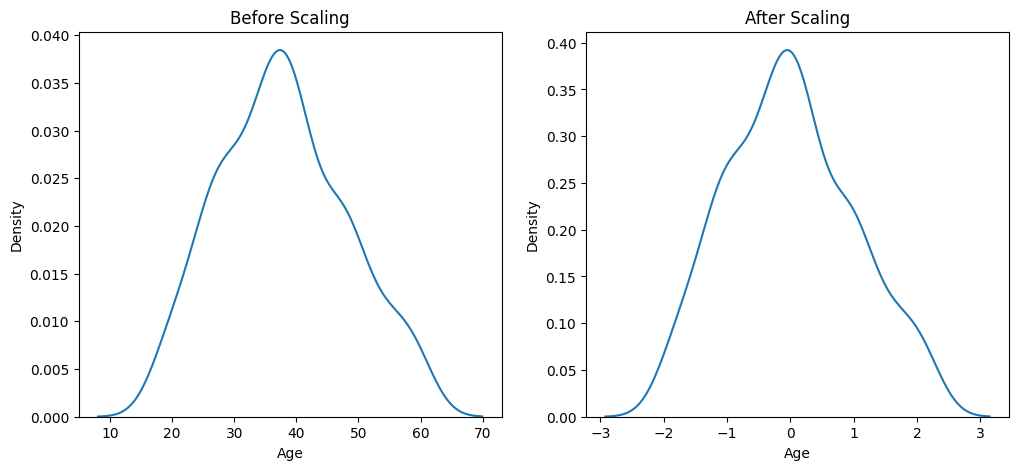

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

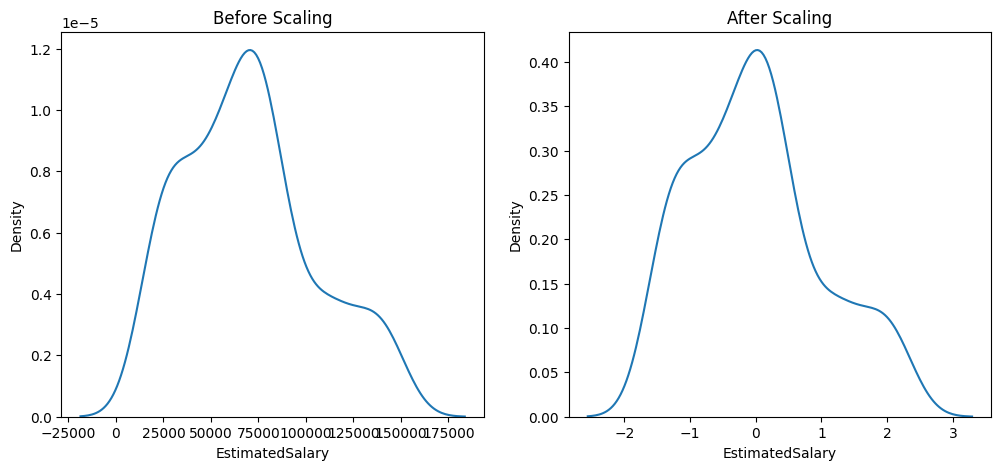

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

#### Importance Of Scaling

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [53]:
#Model fitting
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [48]:
#decision classifier gives same output
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc_scaled = DecisionTreeClassifier()

In [49]:
dc.fit(X_train, y_train)
dc_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dc.predict(X_test)
y_pred_scaled = dc_scaled.predict(X_test_scaled)

In [51]:
print("Actual:", accuracy_score(y_test,y_pred))
print("Scaled:", accuracy_score(y_test,y_pred_scaled))

Actual: 0.875
Scaled: 0.8666666666666667
